<a href="https://colab.research.google.com/github/cromi0256/Study01/blob/main/6%EC%9E%A5_%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6장 탐색적 데이터분석

In [1]:
#6-1 일반
#데이터 불러오기
import pandas as pd
titanic=pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#기본정보 확인
print(titanic.info())
#컬럼,결측치,데이터타입, 샘플수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
#특성 삭제
titanic=titanic.drop(['PassengerId','Cabin'],axis=1)  #불필요한 특성, 결측치가 많은 특성 제거

In [4]:
#특성 타입 변경
num=['Age','SibSp','Parch','Fare']
cat=['Survived','Pclass','Name','Sex','Ticket','Embarked']
for col in cat:
    titanic[col]=titanic[col].astype('category')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB
None


In [5]:
#기술통계
print(titanic.describe()) #숫자형 변수
print('\n',titanic.describe(include='category'))  #범주형 변수
##print(titanic.describe(include='all'))  모든 변수 출력

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

         Survived  Pclass                 Name   Sex Ticket Embarked
count        891     891                  891   891    891      889
unique         2       3                  891     2    681        3
top            0       3  Abbing, Mr. Anthony  male   1601        S
freq         549     491                    1   577      7      644


In [6]:
#6-2 질적변수(범주형 변수)
freq=titanic['Survived'].value_counts()
print(freq) #도수분포표
freq_norm=titanic['Survived'].value_counts(normalize=True)
print(freq_norm)  #상대도표분포표

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [7]:
#상관계수:스피어만, 켄달타우
from scipy.stats import spearmanr, kendalltau
corr1,p1=spearmanr(titanic['Survived'],titanic['Pclass'])
print('스피어만 상관계수 : {:.3f}, p값 : {:.3f}'.format(corr1,p1))
corr2,p2=kendalltau(titanic['Survived'],titanic['Pclass'])
print('켄달타우 상관계수 : {:.3f}, p값 : {:3f}'.format(corr2,p2))

스피어만 상관계수 : -0.340, p값 : 0.000
켄달타우 상관계수 : -0.324, p값 : 0.000000


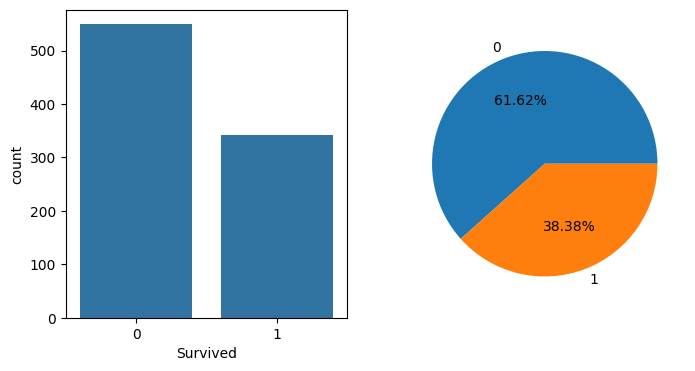

In [8]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(1,2,figsize=(8,4))
sns.countplot(x='Survived',data=titanic,ax=ax[0])
#또는 titanic['Survived'].value_counts().plot.bar(ax=ax[0],rot=0)
ax[1].pie(titanic['Survived'].value_counts(),labels=titanic['Survived'].value_counts().index,autopct='%.2f%%')
plt.show()

In [9]:
#6-3 양적변수(숫자형 변수)
df=titanic['Age'].copy()
#df=df.sort_values(ascending=True).reset_index(drop=True)

cut=pd.cut(df,bins=5)
print(cut.value_counts().sort_index())
print(cut.value_counts(normalize=True).sort_index())

Age
(0.34, 16.336]      100
(16.336, 32.252]    346
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: count, dtype: int64
Age
(0.34, 16.336]      0.140056
(16.336, 32.252]    0.484594
(32.252, 48.168]    0.263305
(48.168, 64.084]    0.096639
(64.084, 80.0]      0.015406
Name: proportion, dtype: float64


In [10]:
#값으로 분할
import numpy as np
cut2=pd.cut(df,[0,20,40,60,np.inf])
print(cut2.value_counts().sort_index())
print(cut2.value_counts(normalize=True).sort_index())

Age
(0.0, 20.0]     179
(20.0, 40.0]    385
(40.0, 60.0]    128
(60.0, inf]      22
Name: count, dtype: int64
Age
(0.0, 20.0]     0.250700
(20.0, 40.0]    0.539216
(40.0, 60.0]    0.179272
(60.0, inf]     0.030812
Name: proportion, dtype: float64


In [19]:
#통계량
age=titanic['Age'].copy()
age=age.dropna()
print(age.mean())  #산술평균
from scipy.stats.mstats import gmean, hmean
print(gmean(age),hmean(age)) #기하평균,조화평균

#중위수, 최빈값
print(age.median(),'중위수')
print(age.mode()[0],'최빈값')

#4분위수
print(age.quantile([0.25,0.5,0.75]))

29.69911764705882
24.42988031292707 13.408573953438005
28.0 중위수
24.0 최빈값
0.25    20.125
0.50    28.000
0.75    38.000
Name: Age, dtype: float64


In [23]:
#산포도
print(age.std(),age.var()) #표준편차, 분산

#왜도,첨도
from scipy.stats import skew, kurtosis
print(skew(age),kurtosis(age))

#상관관계
from scipy.stats import pearsonr
titanic=titanic.dropna()
corr,p=pearsonr(titanic['Survived'],titanic['Age'])
print(corr,p)

14.526497332334044 211.0191247463081
0.3882898514698657 0.16863657224286044
-0.08244586804341393 0.027820316250851233


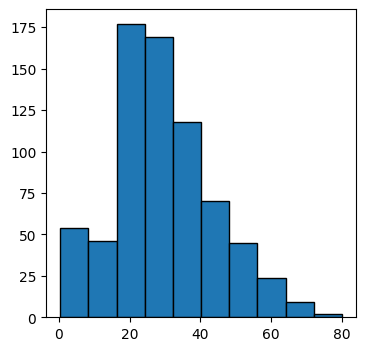

In [24]:
#시각화
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.hist(age,bins=10,edgecolor='black')
plt.show() #분포도

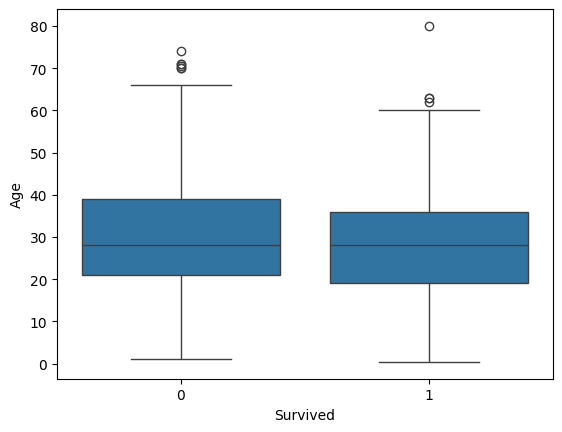

In [25]:
sns.boxplot(x='Survived',y='Age',data=titanic)  #산포도
plt.show()

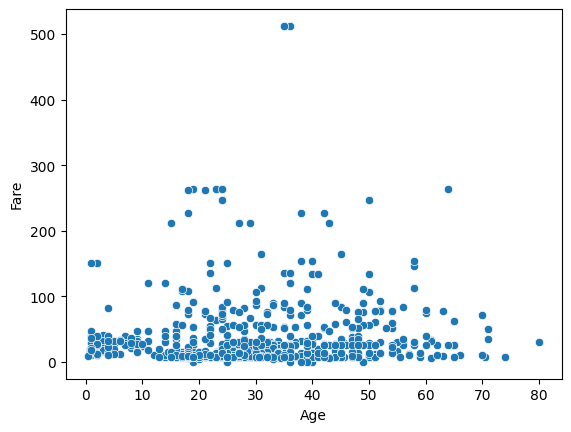

In [28]:
sns.scatterplot(x='Age',y='Fare',data=titanic)  #상관도
plt.show()